# Деревья решений

In [36]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

%matplotlib inline

In [ ]:
# Task
# criterion: “gini”, “entropy”. default=”gini”
# Задание: постройте и визуализируйте структуру решающего дерева
# для критерия разбиения “entropy"

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

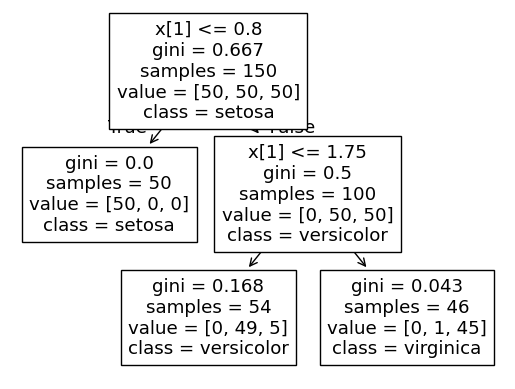

In [1]:


iris = load_iris()
X = iris.data[:, 2:]
target_names = iris.target_names
feature_names = iris.feature_names[2:]
y = iris.target

# criterion: “gini”, “entropy”, “log_loss”. default=”gini”
tree_clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state=14)
tree_clf_gini.fit(X, y)

tree.plot_tree(tree_clf_gini, class_names = iris.target_names)

[Text(0.4, 0.8333333333333334, 'x[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

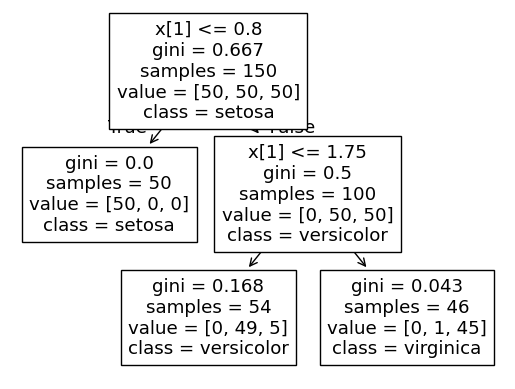

In [2]:
# criterion: "entropy"
tree_clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=14)
tree_clf_entropy.fit(X, y)
tree.plot_tree(tree_clf_gini, class_names = iris.target_names)

## Прикладная задача: предсказание времени задержки

In [9]:
!jar xf archive.zip

In [10]:
train = pd.read_csv('departure-delayed/train_features.csv').fillna(0)

In [11]:
y = pd.read_csv('departure-delayed/train_target.csv', index_col='id')

In [12]:
y[:5]

,DelayTime
id,
0,15.0
1,40.0
2,31.0
3,71.0
4,15.0


Размеры выборок

In [13]:
train.shape, y.shape

((1355730, 13), (1355730, 1))

Посмотрим как выглядят данные

In [14]:
train.head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,Distance
0,2008,4,23,3,700,907,US,1195,N119US,307.0,PHL,PHX,2075
1,2008,7,18,5,2154,2349,US,401,N637AW,115.0,PHX,SFO,651
2,2008,12,21,7,1921,1949,NW,1767,N782NC,88.0,DTW,MSN,312
3,2008,4,24,4,1955,2020,WN,1865,N272WN,145.0,SAT,PHX,843
4,2008,6,27,5,1700,1848,OH,5186,N804CA,108.0,ORF,CVG,485


Для начала, мы рассмотрим переменные, заданные числами

In [15]:
train.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,Distance
count,1355730.0,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06
mean,2008.0,6.110740e+00,1.574999e+01,3.983747e+00,1.467329e+03,1.634319e+03,2.184460e+03,1.342627e+02,7.655388e+02
std,0.0,3.483056e+00,8.777616e+00,1.996024e+00,4.248367e+02,4.644701e+02,1.944718e+03,7.133404e+01,5.745182e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.200000e+01,1.100000e+01
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,6.100000e+02,8.200000e+01,3.380000e+02
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.705000e+03,1.543000e+03,1.160000e+02,6.060000e+02
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.015000e+03,3.422000e+03,1.650000e+02,9.980000e+02
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,9.741000e+03,6.600000e+02,4.962000e+03


In [16]:
# Проверим, прежде чем выкидывать признак:
print("Значений признака 'year' в трейне " ,  train['Year'].nunique())
# print("Значений признака 'year' в тесте " ,  test['Year'].nunique())

Значений признака 'year' в трейне  1


Итак, какие выводы мы можем сделать?
1. Признак `year` не несет вариативности в данные - удалим его
2. Признаки `Month`, `DayofMonth`, `DayOfWeek` скорее всего можно рассматривать как категориальные

In [17]:
train.drop('Year', axis=1, inplace=True)
# test.drop('Year', axis=1, inplace=True)

In [18]:
types = train.dtypes
real_cols = list(types[types != 'object'].index.values)
cat_cols = list(types[types == 'object'].index.values)
types

,0
Month,int64
DayofMonth,int64
DayOfWeek,int64
CRSDepTime,int64
CRSArrTime,int64
UniqueCarrier,object
FlightNum,int64
TailNum,object
CRSElapsedTime,float64
Origin,object


##### Разделение тренировочной выборки на тренировочную и валидационную

In [19]:
x_train, x_val, y_train, y_val = train_test_split(train, y, train_size=0.8, test_size=0.2, random_state=42)

In [21]:
dt = DecisionTreeRegressor()
dt.fit(x_train[real_cols], y_train)
mse_train = mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
mse_val = mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
print(mse_train, mse_val)

0.0 43.45512380783784


###Регуляризация дерева: по глубине и количеству экземпляру в листьях

In [22]:
mse_train = []
mse_val = []

for i in range(20):
    dt = DecisionTreeRegressor(max_depth=i*5+1, min_samples_leaf=1000)
    dt.fit(x_train[real_cols], y_train)
    mse_train = np.append(mse_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mse_val = np.append(mse_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

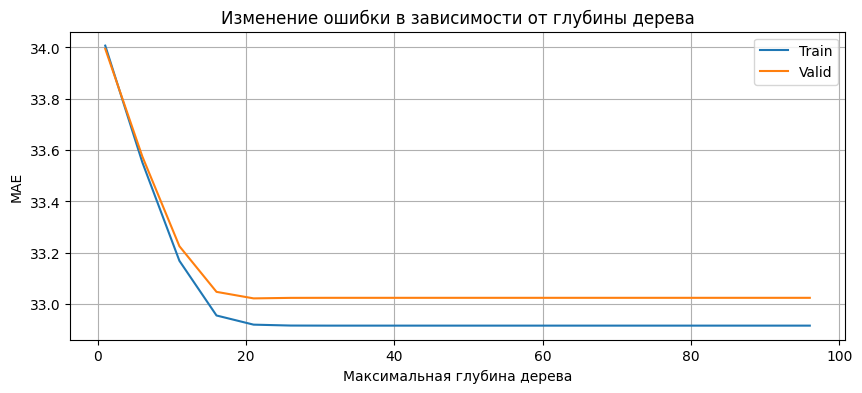

In [23]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева')

plt.plot([i*5 + 1 for i in range(20)], mse_train, label='Train')
plt.plot([i*5 + 1 for i in range(20)], mse_val, label='Valid')
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.grid()
plt.show()

In [ ]:
# обучите серию классификаторов без регуляризации по минимальному количеству экземпляров в листе.
# визуализируйте MAE

In [25]:
mae_train = []
mae_val = []

for i in range(20):
    dt = DecisionTreeRegressor(max_depth=i*5+1)
    dt.fit(x_train[real_cols], y_train)
    mae_train = np.append(mae_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mae_val = np.append(mae_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

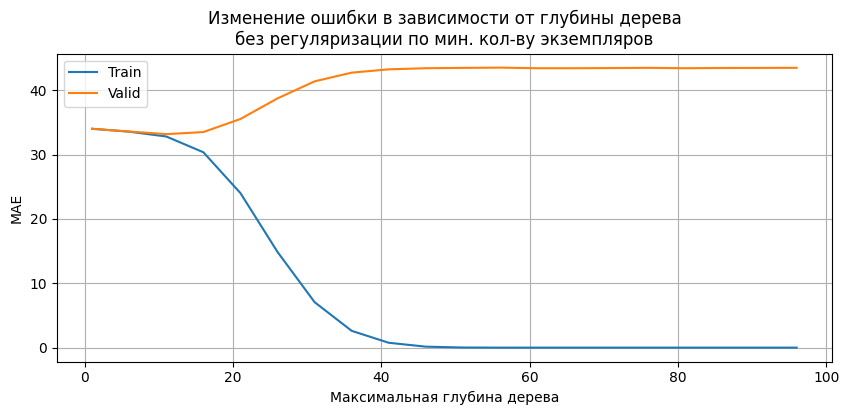

In [26]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева\nбез регуляризации по мин. кол-ву экземпляров')

plt.plot([i*5 + 1 for i in range(20)], mae_train, label='Train')
plt.plot([i*5 + 1 for i in range(20)], mae_val, label='Valid')
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.grid()
plt.show()

In [ ]:
#Без использования регуляризации по минимальному числу экземпляров, с увеличением глубины дерева 
#средняя абсолютная ошибка (MAE) на тренировочной и тестовой выборках начинает значительно 
#расходиться. При этом MAE на тренировочной выборке становится равной нулю, что свидетельствует о 
#переобучении модели.

In [31]:
# Обучение классификаторов c регуляризацией по минимальному количеству экземпляров в листе
mae_train = []
mae_val = []

for i in range(1000, 1, -100):
    dt = DecisionTreeRegressor(max_depth=20, min_samples_leaf=i)
    dt.fit(x_train[real_cols], y_train)

    mae_train = np.append(mae_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))

    mae_val = np.append(mae_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

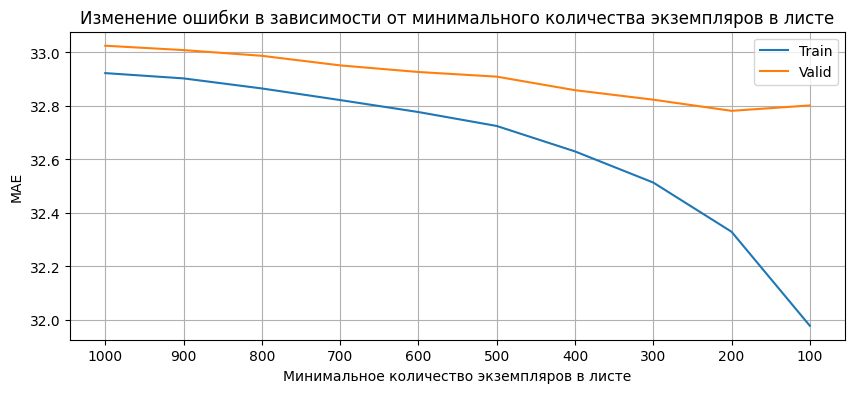

In [32]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от минимального количества экземпляров в листе')
plot_x = [i for i in range(len(mae_train))]
plt.plot(plot_x, mae_train, label='Train')
plt.plot(plot_x, mae_val, label='Valid')
plt.xticks(plot_x, range(1000, 1, -100))
plt.legend()
plt.xlabel('Минимальное количество экземпляров в листе')
plt.ylabel('MAE')
plt.grid()
plt.show()

In [34]:
# обучите дерево с наилучшими параметрами из предыдущего примера
best_dt = DecisionTreeRegressor(max_depth=20, min_samples_leaf=200)
best_dt.fit(x_train[real_cols], y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=200)

## Bagging

In [38]:
bag_of_trees = BaggingRegressor(best_dt, n_estimators=5, random_state=14)

In [39]:
bag_of_trees.fit(x_train[real_cols], y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20,
                                                 min_samples_leaf=200),
                 n_estimators=5, random_state=14)

In [40]:
bag_mse_val = mean_absolute_error(bag_of_trees.predict(x_val[real_cols]), y_val)
bag_mse_val

32.64807942062384

In [41]:
bag_mse_train = mean_absolute_error(bag_of_trees.predict(x_train[real_cols]), y_train)
bag_mse_train

32.33348478766185

In [ ]:
# Задача: выбрать оптимальное количество регрессоров, оптимальные параметры для Bagging Regressor
# Выбрать оптимальные параметры для каждого дерева.

In [43]:
mae_train = []
mae_val = []

estimator_list = [
    5,
    10,
    20,
    30,
    50,
    70,
    90,
    100
]

for k, i in enumerate(estimator_list):
    print(f"{k + 1}/{len(estimator_list)}")
    dt = BaggingRegressor(best_dt, n_estimators=i, n_jobs=-1)
    dt.fit(x_train[real_cols], y_train)

    mae_train = np.append(mae_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mae_val = np.append(mae_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

1/8


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


2/8


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


3/8


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


4/8


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


5/8


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


6/8


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


7/8


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


8/8


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


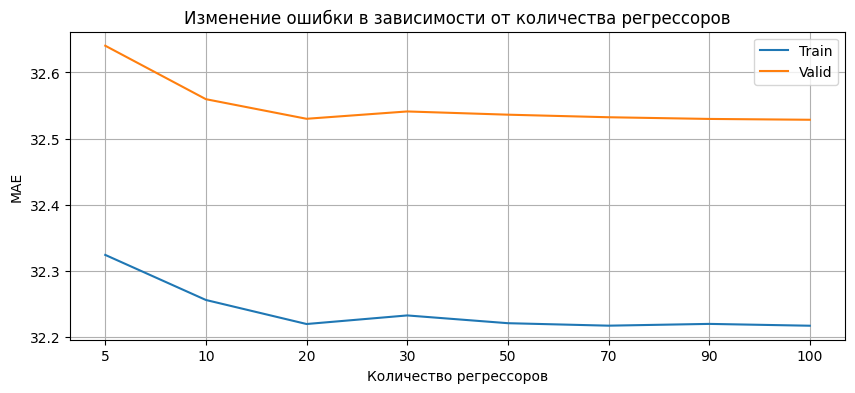

In [44]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от количества регрессоров')
plot_x = [i for i in range(len(mae_train))]
plt.plot(plot_x, mae_train, label='Train')
plt.plot(plot_x, mae_val, label='Valid')
plt.xticks(plot_x, estimator_list)
plt.legend()
plt.xlabel('Количество регрессоров')
plt.ylabel('MAE')
plt.grid()
plt.show()

### MAE для Бэггинг
с n_estimators=20
и с max_depth и min_samples_leaf из предыдущей задачи

In [47]:
bagging_dt = BaggingRegressor(best_dt, n_estimators=20, random_state=14)
bagging_dt.fit(x_train[real_cols], y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20,
                                                 min_samples_leaf=200),
                 n_estimators=20, random_state=14)

In [48]:
best_mae_val = mean_absolute_error(bagging_dt.predict(x_val[real_cols]), y_val)
best_mae_train = mean_absolute_error(bagging_dt.predict(x_train[real_cols]), y_train)

print(f'test mae = {best_mae_val:.4f}')
print(f'train mae = {best_mae_train:.4f}')

test mae = 32.5780
train mae = 32.2603


## 2.3 Random Forest

In [49]:
# Задача: обучить, выявить оптимальное количество моделей в регрессоре, оптимальные параметры для регрессора
forest = RandomForestRegressor(n_estimators=5, n_jobs=-1, random_state=14, criterion='squared_error', max_depth=9)
forest.fit(x_train[real_cols], y_train)
rf_mse_val = mean_absolute_error(forest.predict(x_val[real_cols]), y_val)
rf_mse_val

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


33.24348198085753

In [ ]:
# Оптимальное количество моделей

In [51]:
mae_train = []
mae_val = []

estimators = [
    5,
    10,
    15,
    20,
    25
]

for k, i in enumerate(estimators):
    print(f"{k + 1}/{len(estimators)}")
    dt = RandomForestRegressor(n_estimators=i, n_jobs=-1, random_state=14, criterion='squared_error')
    dt.fit(x_train[real_cols], y_train)

    mae_train = np.append(mae_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mae_val = np.append(mae_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

1/5


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


2/5


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


3/5


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


4/5


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


5/5


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


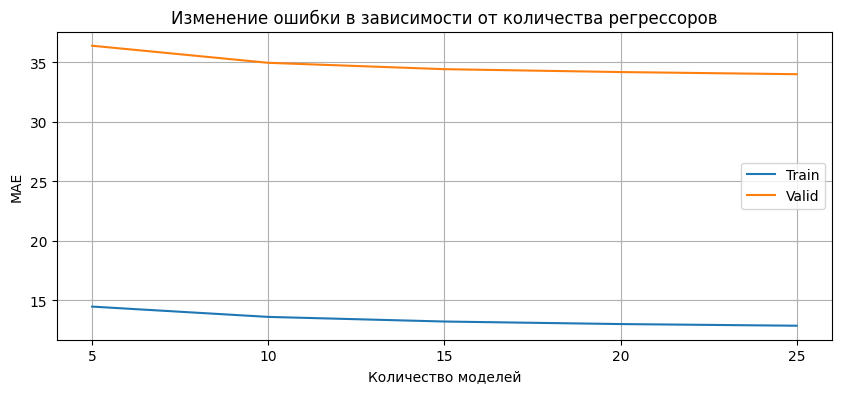

In [52]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от количества регрессоров')
plot_x = [i for i in range(len(mae_train))]
plt.plot(plot_x, mae_train, label='Train')
plt.plot(plot_x, mae_val, label='Valid')
plt.xticks(plot_x, estimators)
plt.legend()
plt.xlabel('Количество моделей')
plt.ylabel('MAE')
plt.grid()
plt.show()

In [ ]:
# Параметр максимальной глубины дерева
# Оставим 10 моделей

In [53]:
mae_train = []
mae_val = []

max_depths = [
    1,
    10,
    20,
    30
]

for k, i in enumerate(max_depths):
    print(f"{k + 1}/{len(max_depths)}")
    dt = RandomForestRegressor(n_estimators=10, max_depth=i, n_jobs=-1, random_state=14, criterion='squared_error')
    dt.fit(x_train[real_cols], y_train)

    mae_train = np.append(mae_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mae_val = np.append(mae_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

1/4


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


2/4


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


3/4


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


4/4


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


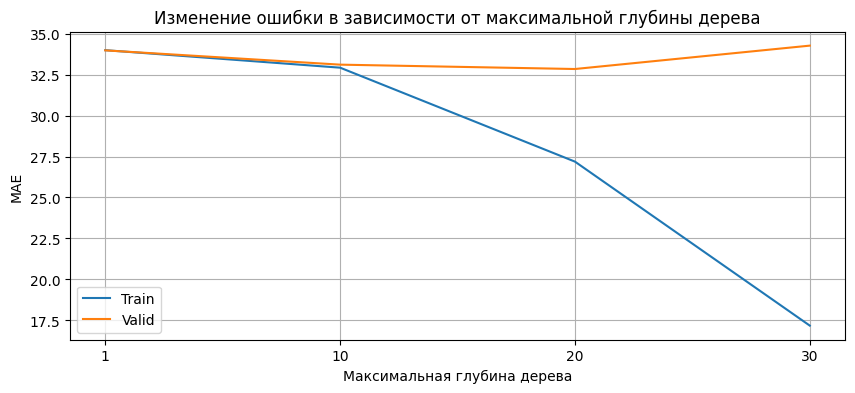

In [54]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от максимальной глубины дерева')
plot_x = [i for i in range(len(mae_train))]
plt.plot(plot_x, mae_train, label='Train')
plt.plot(plot_x, mae_val, label='Valid')
plt.xticks(plot_x, max_depths)
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.grid()
plt.show()

In [ ]:
# Будем использовать значения около 10
# Параметр количества экземпляров в листьях дерева

In [55]:
mae_train = []
mae_val = []

for i in range(1000, 0, -100):
    dt = RandomForestRegressor(n_estimators=10, min_samples_leaf=i, n_jobs=-1, random_state=14, criterion='squared_error')
    dt.fit(x_train[real_cols], y_train)

    mae_train = np.append(mae_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))

    mae_val = np.append(mae_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

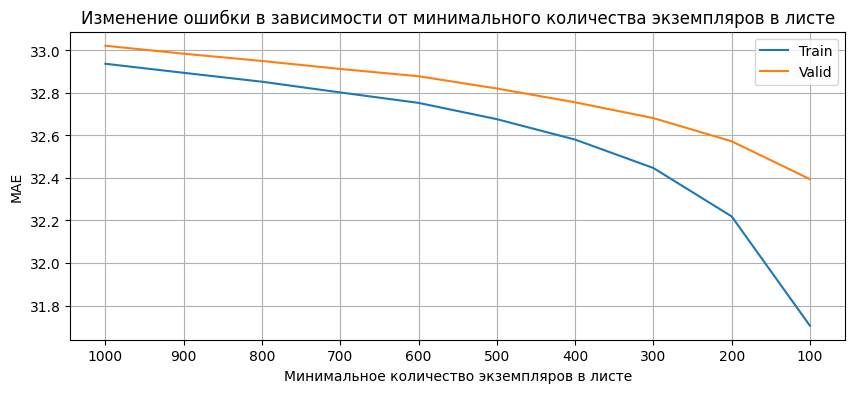

In [56]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от минимального количества экземпляров в листе')
plot_x = [i for i in range(len(mae_train))]
plt.plot(plot_x, mae_train, label='Train')
plt.plot(plot_x, mae_val, label='Valid')
plt.xticks(plot_x, range(1000, 0, -100))
plt.legend()
plt.xlabel('Минимальное количество экземпляров в листе')
plt.ylabel('MAE')
plt.grid()
plt.show()

In [ ]:
# Будем использовать значения 200, 300 и 400

In [57]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [200, 300, 400]
}
forest_model = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=14)
forest_cv = GridSearchCV(forest_model, param_grid, n_jobs=-1, scoring="neg_mean_absolute_error")
forest_cv.fit(x_train[real_cols], y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(estimator=RandomForestRegressor(n_estimators=10, n_jobs=-1,
                                             random_state=14),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [200, 300, 400]},
             scoring='neg_mean_absolute_error')

In [ ]:
# Параметры и значения ошибки MAE

In [58]:
print('best params: ', forest_cv.best_params_)

mae_train = mean_absolute_error(forest_cv.predict(x_train[real_cols]), y_train)
mae_val = mean_absolute_error(forest_cv.predict(x_val[real_cols]), y_val)
print('mae train =', np.round(mae_train, 4))
print('mae test =', np.round(mae_val, 4))

best params:  {'max_depth': 15, 'min_samples_leaf': 200}
mae train = 32.5502
mae test = 32.7638
